In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Principal Component Analysis

Load and plot the "PCA.csv" data:

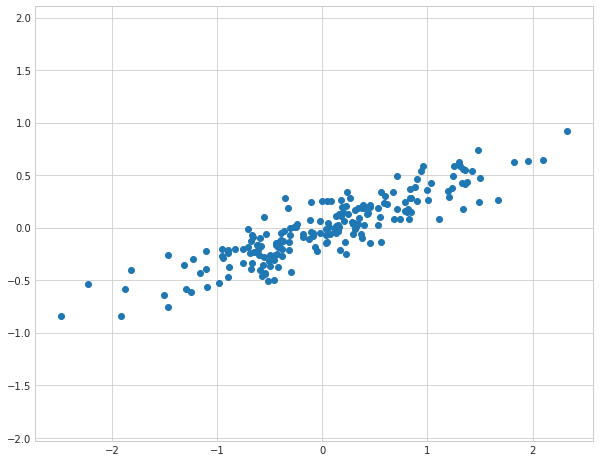

In [2]:
X1 = np.genfromtxt('PCA.csv',delimiter=',')
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    plt.scatter(X1[:, 0], X1[:, 1])
    plt.axis('equal');

Use sklearn's PCA to find 2 principal components on the X

In [3]:
# TODO 
# Fit a PCA with 2 components on the X (n_components=2)
pca = PCA(n_components=2)
pca.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Print the explained variance of the eigenvectors:

In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Draw the eigenvectors and the transformed datapoints:

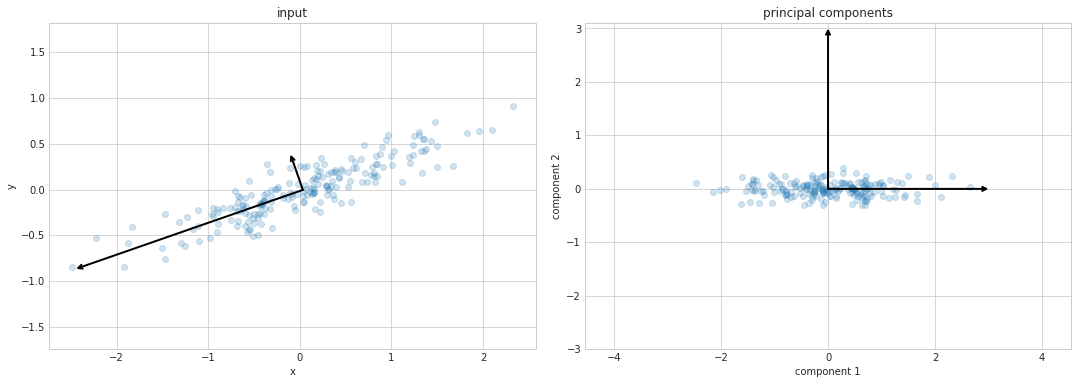

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

    # plot data
    ax[0].scatter(X1[:, 0], X1[:, 1], alpha=0.2)
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
    ax[0].axis('equal');
    ax[0].set(xlabel='x', ylabel='y', title='input')

    # plot principal components
    X_pca = pca.transform(X1)
    ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
    draw_vector([0, 0], [0, 3], ax=ax[1])
    draw_vector([0, 0], [3, 0], ax=ax[1])
    ax[1].axis('equal')
    ax[1].set(xlabel='component 1', ylabel='component 2',
              title='principal components',
              xlim=(-5, 5), ylim=(-3, 3.1))

### Plot the principal components and explain what are they with respect to the datapoints?


- The components are the axes representing the directions of most variance in the space of the data.

Fit a sklearn PCA with only the first eigenvector:

In [7]:
pca = PCA(n_components=1)
pca.fit(X1)
X_pca = pca.transform(X1)
print("original shape:   ", X1.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Transform the X_pca back to 2 dimensions using pca.inverse_transform

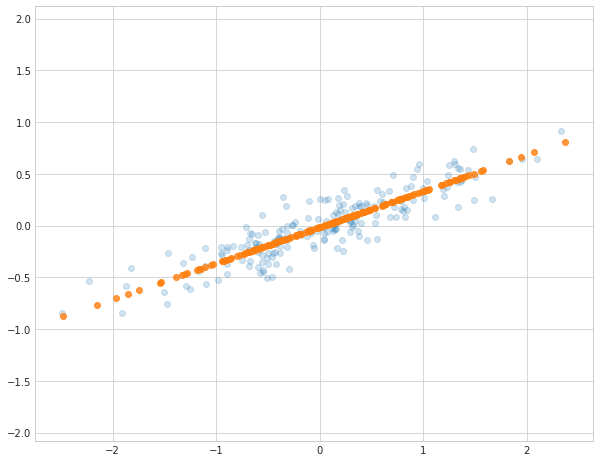

In [8]:
# TODO
# transform the X_pca back to two dimensions using pca.inverse_transform
X_new = pca.inverse_transform(X_pca)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal');

### Perform inverse transformation on the transformed features and plot them with the original features. How do these datapoints relate the first principal component?


- With only one component, the space of the data set is flattened along the axis of most variance. 

Load the Iris dataset

In [9]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


extract features and labels in X2 and y2

In [10]:
# TODO
# Extract features and labels
X2 = df[df.columns[:4]].to_numpy()
y2 = df[df.columns[4]].to_numpy()

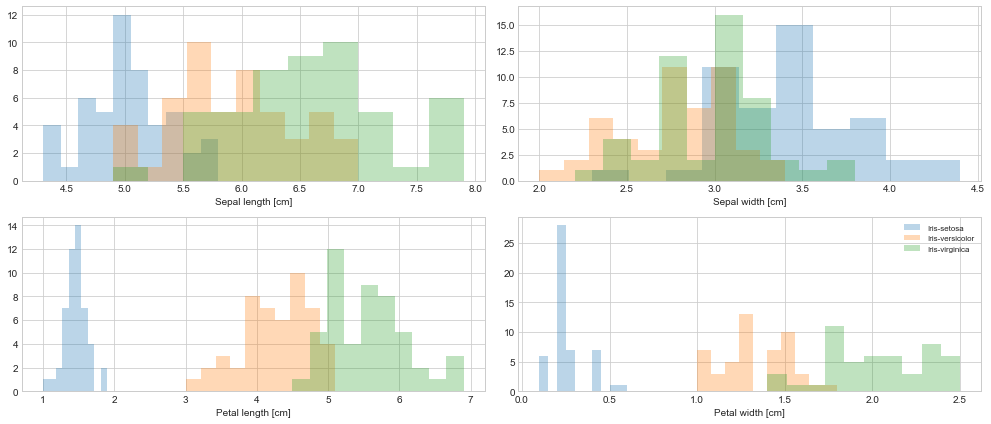

In [11]:
def plot_histograms(X, y):
  label_dict = {1: 'Iris-Setosa',
                2: 'Iris-Versicolor',
                3: 'Iris-Virgnica'}

  feature_dict = {0: 'Sepal length [cm]',
                  1: 'Sepal width [cm]',
                  2: 'Petal length [cm]',
                  3: 'Petal width [cm]'}

  with plt.style.context('seaborn-whitegrid'):
      plt.figure(figsize=(14, 6))
      for cnt in range(4):
          plt.subplot(2, 2, cnt+1)
          for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
              plt.hist(X[y==lab, cnt],
                       label=lab,
                       bins=10,
                       alpha=0.3,)
          plt.xlabel(feature_dict[cnt])
      plt.legend(loc='upper right', fancybox=True, fontsize=8)

      plt.tight_layout()
      plt.show()

plot_histograms(X2, y2)

Standardize the datapoints using StandardScaler:

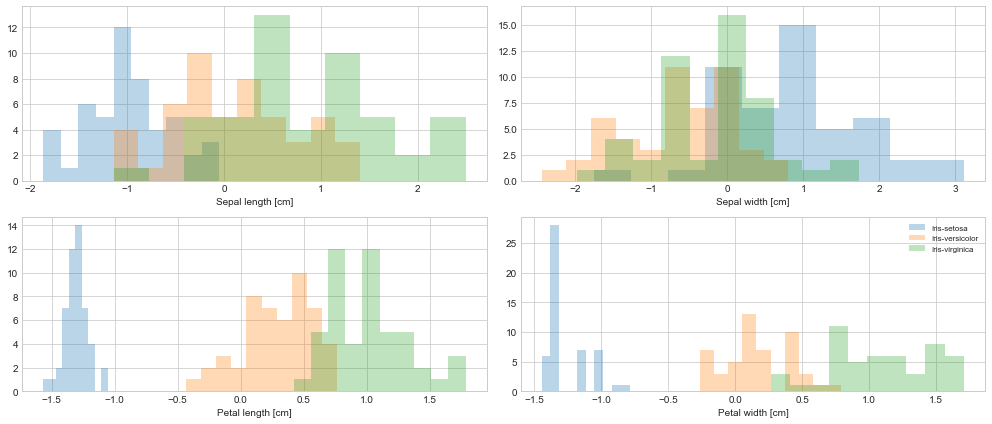

In [12]:
# TODO
# Standardize the data and assign them to X_std
scaler = StandardScaler()
X_std = scaler.fit_transform(X2)
plot_histograms(X_std, y2)

### Use StandardScaler from sklearn in order to standardize the dataset features. Plot the histogram once again and explain what has happend to the features?


- The features are now centered around zero and each scaled to unit variance. 

Compute the covariance matrix

In [13]:
# TODO
# Complete the comput_cov using the formula given in the PDF file
def comput_cov(X):
    mean_vec = np.mean(X, axis=0)
    X_hat = np.subtract(X, mean_vec)
    n = X.shape[0]
    cov_mat = (1/n)*(np.dot(X_hat.T, X_hat))
    
    return cov_mat

cov_mat = comput_cov(X_std)
print("Covariance matrix: \n%s" %comput_cov(X_std) )

Covariance matrix: 
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [14]:
def Sort_eigens(cov_mat):
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)

    print('Eigenvectors \n%s' %eig_vecs)
    print('\nEigenvalues \n%s' %eig_vals)
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = zip(eig_vals, eig_vecs)

    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs = sorted(eig_pairs, key=lambda x: x[0], reverse=True)
    return eig_pairs
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = Sort_eigens(cov_mat)
print('\nEigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]

Eigenvalues in descending order:
2.910818083752052
0.921220930707225
0.14735327830509595
0.02060770723562525


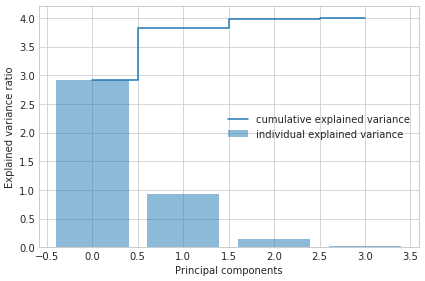

In [15]:
# TODO
# compute the explained and cumulative explained variance

var_exp = []
for i in eig_pairs:
    var_exp.append(i[0])
    
cum_var_exp = []
for i in range(len(var_exp)):
    cum_var_exp.append(sum(var_exp[:i+1]))

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


### Compute the explained and cumulative explained variance from eigenvalues and plot them. Explain why it’s enough to choose the first two principal components and omit the rest based on this plot.


- The first two components account for nearly all of the total variance, which means we can ignore the others with little loss of information

Implement MY_PCA() for full PCA procedure:

In [17]:
def My_PCA(X,n_components):
    cov_mat = comput_cov(X)
    eig_pairs = Sort_eigens(cov_mat)
    matrix_w = np.zeros((X.shape[1],n_components)) # initialize matrix_w
    for i in range(n_components): # pick the first n eigen vectors from the sorted eig_pairs
        matrix_w[:,i] = eig_pairs[i][1] 
        
    print('Matrix W:\n %s' %matrix_w)
    Z = np.dot(X,matrix_w) # reduce the dimensions of X and assign them to Z
    return Z
Z = My_PCA(X2,2)

Eigenvectors 
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]

Eigenvalues 
[4.19667516 0.24062861 0.07800042 0.02352514]
Matrix W:
 [[ 0.36158968 -0.08226889]
 [-0.65653988 -0.72971237]
 [-0.58099728  0.59641809]
 [ 0.31725455 -0.32409435]]


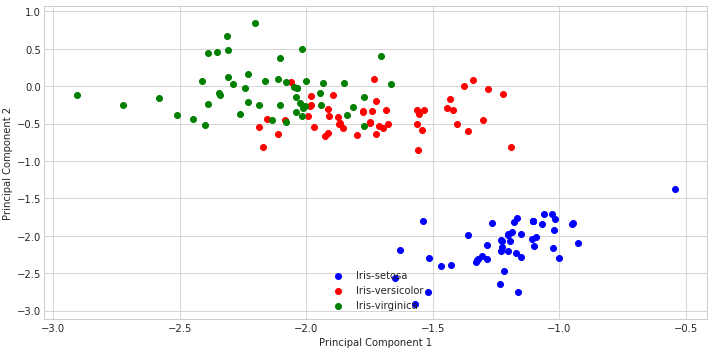

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 5))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Z[y2==lab, 0],
                    Z[y2==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()



Perform PCA from sklearn and see if the results match

In [19]:
# TODO
# use sklearn pca on iris data
sklearn_pca = PCA(n_components=2)
Z_sklearn = sklearn_pca.fit_transform(X2)

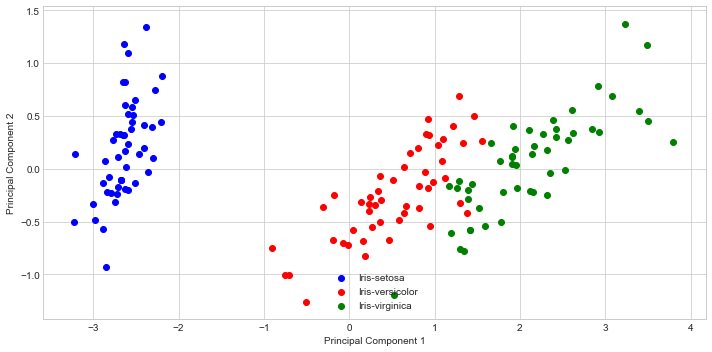

In [20]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 5))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Z_sklearn[y2==lab, 0],
                    Z_sklearn[y2==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

Perform your PCA on the X1 from the "PCA.csv" dataset with 1 dimension as well and compare it with X_pca 

In [21]:
# TODO
# perform PCA with 1 principal component on the X1 and compare it with X_pca

Z1 = My_PCA(X1,1)

print("\nsklearn PCA components:\n" + str(pca.components_))

Eigenvectors 
[[ 0.94446029 -0.32862557]
 [ 0.32862557  0.94446029]]

Eigenvalues 
[0.75871884 0.01838551]
Matrix W:
 [[ 0.94446029]
 [-0.32862557]]

sklearn PCA components:
[[-0.94446029 -0.32862557]]


- The components are identical

# Autoencoders for dimensionality reduction

Load the fashion mnist.

In [22]:
from keras.datasets import fashion_mnist
(data, labels), (_, _) = fashion_mnist.load_data()

Using TensorFlow backend.


In [23]:
data = data.reshape(-1, 28*28) / 255. # scale the data features

In [24]:
from keras import models, layers

In [25]:
#TODO
# complete the function below for autoencoder
def dim_red_ae(data,n_dims_encoded=2):
    input_layer = layers.Input(shape=(data.shape[1],))
    encoding_layer = layers.Dense(n_dims_encoded,activation='tanh')(input_layer)
    decoding_layer = layers.Dense(data.shape[1],activation='tanh')(encoding_layer)
    autoencoder = models.Model(input_layer, decoding_layer)
    autoencoder.compile('adam', loss='mse')
    autoencoder.fit(x = data, y = data, epochs=5)
    encoder = models.Model(input_layer, encoding_layer)
    return encoder,autoencoder

In [27]:
encoder,autoencoder = dim_red_ae(data,n_dims_encoded=2)
encodings = encoder.predict(data)

Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0636
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.0473
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0466
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0464
Epoch 5/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0463


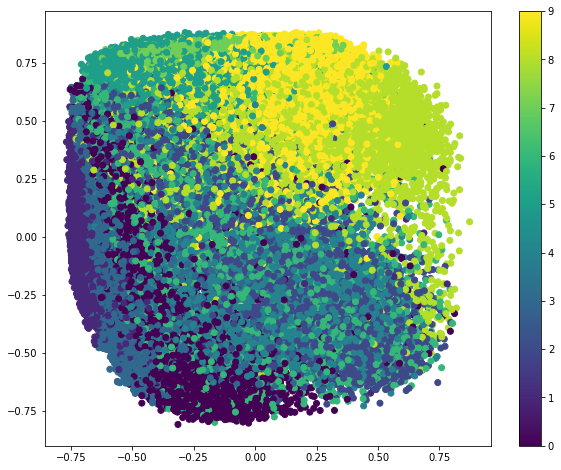

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(encodings[:, 0], encodings[:, 1], c=labels)
plt.colorbar()

<Figure size 720x720 with 0 Axes>

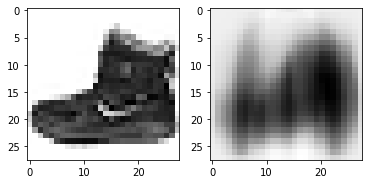

In [29]:
img = autoencoder.predict(data)
img = img[0].reshape(28,28)
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(1,2)
ax[0].imshow(data[0].reshape(28,28),cmap="Greys")
ax[1].imshow(img, cmap="Greys")

Train and run the autoencoder for 100 dimensions of the hidden layer:

Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0188
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0111
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0104
Epoch 4/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0101
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0099


<Figure size 720x720 with 0 Axes>

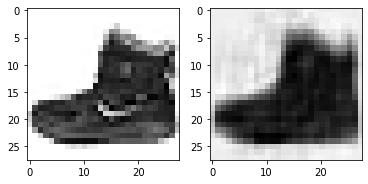

In [30]:
#TODO
encoder,autoencoder = dim_red_ae(data,100)
img = autoencoder.predict(data)
img = img[0].reshape(28,28)
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(1,2)
ax[0].imshow(data[0].reshape(28,28),cmap="Greys")
ax[1].imshow(img, cmap="Greys")

### How did the reconstructed image compare to two dimensional encoding-decoding?


- With 100 dims, the item is now visually recognizable

In [31]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(data[:10000],labels[:10000])

In [32]:
#TODO
# train and predict a KNN with K=3 on the training and test set and measure the time it takes.
import time
start = time.time()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.predict(X_test)

end = time.time()
print(end - start)

18.422310829162598


perform cross validation to find the best number of hidden dimensions for hidden layer for dimensionality recudtion:

In [33]:
from sklearn.model_selection import cross_val_score
# TODO
# Perform K-fold cross validation with 5 folds to find the best number of hidden dimensions of autoencoder 
# for dimentionality reduction
acc_list = []
possible_dims = [2,5,7,10,15,20]
for dims in possible_dims:
    print("training for %d dimensions"%dims)
    enc, ae = dim_red_ae(X_train, dims)
    X_ = ae.predict(X_train)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_, y_train)
    scores = cross_val_score(knn, X=X_, y=y_train, cv=5)
    acc_list.append(scores)
    
    print("for %d dims scores are :"%dims,scores)
    print("=========================================")
for i in range(len(acc_list)):
    acc_list[i] = np.average(acc_list[i])
best_dim = possible_dims[np.argmax(acc_list)]

training for 2 dimensions
Epoch 1/5
7500/7500 [==============================] - 1s 82us/step - loss: 0.1175
Epoch 2/5
7500/7500 [==============================] - 1s 67us/step - loss: 0.0725
Epoch 3/5
7500/7500 [==============================] - 0s 60us/step - loss: 0.0594
Epoch 4/5
7500/7500 [==============================] - 0s 59us/step - loss: 0.0533
Epoch 5/5
7500/7500 [==============================] - 0s 60us/step - loss: 0.0506
for 2 dims scores are : [0.4730897  0.49201065 0.48533333 0.4953271  0.50501672]
training for 5 dimensions
Epoch 1/5
7500/7500 [==============================] - 1s 86us/step - loss: 0.0959
Epoch 2/5
7500/7500 [==============================] - 0s 60us/step - loss: 0.0554
Epoch 3/5
7500/7500 [==============================] - 0s 60us/step - loss: 0.0459
Epoch 4/5
7500/7500 [==============================] - 0s 60us/step - loss: 0.0417
Epoch 5/5
7500/7500 [==============================] - 0s 61us/step - loss: 0.0391
for 5 dims scores are : [0.67109635 0

In [34]:
best_dim

20

perform model evaluation with best_dim on the test set and measure the time of training and predicting of KNN (K=3)

In [35]:
# TODO
# model evaluation on the test set.

enc, ae = dim_red_ae(X_train, best_dim)
X_train_reduced = ae.predict(X_train)
X_test_reduced = ae.predict(X_test)

start = time.time()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_reduced, y_train)
knn.predict(X_test_reduced)

end = time.time()

print("\n Time to fit and predict: " + str(end - start))
print("Score: " + str(knn.score(X_test_reduced, y_test)))

Epoch 1/5
7500/7500 [==============================] - 1s 96us/step - loss: 0.0642
Epoch 2/5
7500/7500 [==============================] - 0s 62us/step - loss: 0.0348
Epoch 3/5
7500/7500 [==============================] - 0s 61us/step - loss: 0.0290
Epoch 4/5
7500/7500 [==============================] - 0s 63us/step - loss: 0.0262
Epoch 5/5
7500/7500 [==============================] - 0s 66us/step - loss: 0.0244

 Time to fit and predict: 5.057306528091431
Score: 0.7932
